## NOVA IMS - Universidade NOVA de Lisboa
### Data Science for Finance - Fixed Income
#### Group Project

Amina Baklizi - 20230515@novaims.unl.pt <br>
Malik Harrak - 20231140@novaims.unl.pt <br>
Saad Islam - 20230513@novaims.unl.pt <br>
Hugo Laginha - 20231130@novaims.unl.pt <br>

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install datetime
#!pip install python-dateutil
#!pip install Jinja2
#!pip install scipy
#!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display_html
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

### Question 1 - Option A

In [3]:
data = {
    "Notional amount": 25000,
    "Coupon Type": "Fixed",
    "Coupon rate": 6.75,
    "Coupon frequency": "Semi-annual",
    "Currency": "USD",
    "Issue Date": "31/7/2020",
    "Maturity Date": "21/7/2025",
    "Trade Date": "18/09/2020",
    "Settlement Lag": "T+1",
    "Day Count": "ACT/ACT",
    "Inflation Reference Index": "US Consumer Price Index",
    "Inflation Reference Index Level at issue": 237.14365,
    "Inflation Reference Index Level at Settlement": 251.14721
}

greeks_data = {
    "beta_0": 5.9 / 100,
    "beta_1": -1.6 / 100,
    "beta_2": -0.5 /100 ,
    "beta_3": 1.0 / 100,
    "tau_1": 5,
    "tau_2": 0.5
}

df_ilb = pd.DataFrame(data.items(), columns=['Attribute', 'Value'])
df_ilb.set_index('Attribute', inplace = True)

df_greeks = pd.DataFrame(greeks_data.items(), columns=['Parameter', 'Value'])
df_greeks.set_index('Parameter', inplace=True)

Condider a government **Capital Indexed Inflation Linked Bond** (ILB) with term sheet:

In [4]:
df_ilb

,Value
Attribute,
Notional amount,25000
Coupon Type,Fixed
Coupon rate,6.75
Coupon frequency,Semi-annual
Currency,USD
Issue Date,31/7/2020
Maturity Date,21/7/2025
Trade Date,18/09/2020
Settlement Lag,T+1


Assume the CPI index *$I_{t}$* follows a log-normal (geometric Browninan motion), i.e.,
$$ \frac{dI_{t}}{I_{t}} = \mu dt + \sigma dW_{t} $$
where $W_{t}$ is a Wierner process, $\mu$ the constant drift, and $\sigma > 0$ is the diffusion coefficient with estimates $\^\mu= 0.05321$ and $\^\sigma=0.06358$. Assume there is no indexation lag. <br>
<br>
Assume that the issuers yield curve on the valuation date is given by the Nelson-Siegel-Svensson zero-coupon rate function parameters,


In [5]:
df_greeks

,Value
Parameter,
beta_0,0.059
beta_1,-0.016
beta_2,-0.005
beta_3,0.010
tau_1,5.000
tau_2,0.500


Our Capital-Indexed Inflation-Linked Bond's term sheet combined with the Nelson-Siegel-Svensson zero-coupon parameters for visualization purposes.

In [6]:
df_ilb_styler = df_ilb.style.set_table_attributes("style='display:inline'").set_caption("Capital Indexed Inflation Linked Bond's term sheet")
df_greeks_styler = df_greeks.style.set_table_attributes("style='display:inline'").set_caption("Nelson-Siegel-Svensson Zero-Coupon rate function parameters")
html_object = df_ilb_styler._repr_html_() + " " + df_greeks_styler._repr_html_()
display_html(html_object, raw = True)

,Value
Attribute,
Notional amount,25000
Coupon Type,Fixed
Coupon rate,6.750000
Coupon frequency,Semi-annual
Currency,USD
Issue Date,31/7/2020
Maturity Date,21/7/2025
Trade Date,18/09/2020
Settlement Lag,T+1


**Task**: <br><br>
a) Compute the accrued interest.

**Answer:** <br><br>
Accrued Interest: $267.05
The Accrued interest (AI) is computed as:<br><br>
$$ AI = \text{adjusted face value} \times \frac{\text{annual coupon rate \(( \% \))}}{\text{coupon frequency}} \times \frac{u}{w} $$

where: <br><br>

&emsp;$\text{adjusted face value} = \text{face vaule} \times \frac{\text{Inflation Index at Settlement}}{\text{Inflation Index at Issue}}$ <br>
&emsp;<em><strong>u</strong></em> - is the number of days from (and including) the last coupon (or from the date when interest begins to accrue). <br>
&emsp;<em><strong>w</strong></em> - is the number of days between the last and next coupon.<br><br>
It should be note that the accrued interest is computed from the <strong>settlement date</strong> not the trading date!<br><br>
In our Capital Indexed Inflation Linked Bond's term sheet there's no specification of when is the next coupon date. We thus assume that interest began to accrue from the issue date.

Thus:

1. Since the trade date happens before there is a coupon payment, *u* is the no. of days from the date when interest begins to accrue, which is July 31st 2020.
2. The trade date was September 18th 2020, a Friday. However, since the Settlement Lag is T+1, the settlement happened only on September 21st, Monday. Hence,  
   $$u = \text{Settlement Date} - \text{Issue Date} = 21/09/2020 - 31/07/2020 = 52 \text{ days}$$
3. Since coupon frequency is equal to 2, this means that the coupons are paid every 6 months. The specific day in which that happens, would be dependent on the maturity date. Since our bond matures July 21st 2025, we would expect that the coupons would happen on both January 21st and July 21st of each year, unless this day would fall in a weekend or a bank holiday, where a convention would have to be followed, like Following Business Day or Modified Following Business Day conventions. In our case this means that the number of days since the last and next coupon would actually be counted from the bond issuance to the first coupon date. Thus,  
   $$w = \text{First Coupon Date} - \text{Issuance Date} = 21/01/2021 - 31/07/2020 = 174 \text{ days}$$
4. The inflation index at settlement is 251.147210 while 237.143650 at issue.
5. The notional amount is $25 000, while the coupon rate is 6.75%.
The accrued interest is thus: <br>
$$AI = 25 000 \times \frac{251.147210}{237.143650} \times \frac{0.0675}{2} \times \frac{52}{174} = \$267.05$$
<br><br>
Let's "codify" this ...
The accrued interest is thus: <br>
$$AI = 25 000 \times \frac{251.147210}{237.143650} \times \frac{0.0675}{2} \times \frac{52}{174} = \$267.05$$
<br><br>
Let's "codify" this ...

In [7]:
# Definition of Notional and Coupon Rate
notional = df_ilb.loc['Notional amount', 'Value']
coupon_rate = df_ilb.loc['Coupon rate', 'Value']

In [8]:
coupon_frequency = 2

In [9]:
# Date calculation functions

def calculate_days_between_dates(start_date_str, end_date_str):
    """
    Calculates the number of days between two dates
    
    :param start_date_str: String of start date in format 'dd/mm/yyyy'
    :param end_date_str: String of start date in format 'dd/mm/yyyy'
    :return: number of days
    """
    start_date = datetime.strptime(start_date_str, "%d/%m/%Y")
    end_date = datetime.strptime(end_date_str, "%d/%m/%Y")
    return (end_date - start_date).days

def get_settlement_date(trade_date_str, settlement_lag):
    """
    Calculates the settlement date for a bond given its trade date and settlement lag
    
    :param trade_date_str: String of trade_date in format 'dd/mm/yyyy
    :param settlement_lag: String of settlement lag in format 'T+N' with N being a number
        example settlement_lag = 'T+0'
                settlement_lag = 'T+1'
                settlement_lag = 'T+2'
    :return: String with settlement date
    """
     
    trade_date = datetime.strptime(trade_date_str, "%d/%m/%Y")
    settlement_day = int(settlement_lag.split('+')[1])
    settlement_date = trade_date + timedelta(days = settlement_day)
    # Determines if settlement_date is a weekend day or not (Saturday = 5 & Sunday = 6)
    if settlement_date.weekday() == 5:
        settlement_date += timedelta(days = 2)
    elif settlement_date.weekday() == 6:
        settlement_date += timedelta(days = 1)
    settlement_date_str = settlement_date.strftime("%d/%m/%Y")
    return settlement_date_str

def get_coupon_dates(maturity_date_str, frequency, issue_date_str=None):
    """
    Calculates the coupon dates for a bond given its maturity date and frequency.
    
    :param maturity_date_str: String of maturity date in format 'dd/mm/yyyy'.
    :param frequency: Coupon frequency per year (e.g., 2 for semi-annual).
    :param issue_date_str: (Optional) String of issue date in format 'dd/mm/yyyy'.
    :return: List of coupon dates in 'dd/mm/yyyy' format.
    """
    maturity_date = datetime.strptime(maturity_date_str, "%d/%m/%Y")
    coupon_dates = []

    # Determine the period in months between coupon payments
    months_between_coupons = 12 // frequency

    # Generate coupon dates, working backward from the maturity date
    current_date = maturity_date
    while issue_date_str is None or current_date >= datetime.strptime(issue_date_str, "%d/%m/%Y"):
        current_date_copy_for_check = datetime(year=current_date.year, month=current_date.month, day=current_date.day)
        # Determines if current_date is a weekend day or not (Saturday = 5 & Sunday = 6)
        if current_date_copy_for_check.weekday() == 5:
            current_date_copy_for_check += timedelta(days = 2)
        elif current_date_copy_for_check.weekday() == 6:
            current_date_copy_for_check += timedelta(days = 1)
        
        coupon_dates.append(current_date_copy_for_check.strftime("%d/%m/%Y"))
        current_date -= relativedelta(months=months_between_coupons)
    coupon_dates.reverse()
    return coupon_dates

def is_date_within_coupon_period(check_date_str, coupon_dates):
    """
    Checks if a given date is within the period covered by the coupon dates.

    :param check_date_str: String of the date to check in format 'dd/mm/yyyy'.
    :param coupon_dates: List of coupon dates in 'dd/mm/yyyy' format.
    :return: Boolean indicating whether the date is within the coupon period.
    """
    check_date = datetime.strptime(check_date_str, "%d/%m/%Y")

    # Convert the coupon dates from string to datetime objects
    coupon_dates_dt = [datetime.strptime(date, "%d/%m/%Y") for date in coupon_dates]

    # Check if the date falls within any of the coupon periods
    for i in range(len(coupon_dates_dt) - 1):
        if coupon_dates_dt[i] <= check_date < coupon_dates_dt[i + 1]:
            return True
    return False

def get_coupon_period_for_date(check_date_str, coupon_dates):
    """
    Calculates the coupon dates before and after a given date.
    
    :param check_date_str: String of date in format 'dd/mm/yyyy'.
    :param coupon_dates: List of strings in 'dd/mm/yyyy' format.
    :return: Two coupon dates both in 'dd/mm/yyyy' format.
    """

    check_date = datetime.strptime(check_date_str, "%d/%m/%Y")
    coupon_dates_dt = [datetime.strptime(date, "%d/%m/%Y") for date in coupon_dates]

    for i in range(len(coupon_dates_dt) - 1):
        if coupon_dates_dt[i] <= check_date < coupon_dates_dt[i + 1]:
            return coupon_dates[i], coupon_dates[i + 1]
    return None

def get_days_between_coupons(coupon_dates, given_date_str, issue_date_str):
    """
    Calculates the number of days between the two nearest coupon dates
    to a given date or between the first coupon date and the issue date
    in case the given date is before the first coupon date.
    
    :param coupon_dates: List of strings in 'dd/mm/yyyy' format.
    :param given_date_str: String of date in format 'dd/mm/yyyy'.
    :param issue_date_str: String of date in format 'dd/mm/yyyy'.
    :return: Two coupon dates both in 'dd/mm/yyyy' format.
    """

    days_in_between = 0
    if datetime.strptime(given_date_str, "%d/%m/%Y") <= datetime.strptime(coupon_dates[0], "%d/%m/%Y"):
        days_in_between = (datetime.strptime(coupon_dates[0], "%d/%m/%Y") - datetime.strptime(issue_date_str, "%d/%m/%Y")).days
    elif is_date_within_coupon_period(given_date_str, coupon_dates):
        start_date_str, end_date_str = get_coupon_period_for_date(given_date_str, coupon_dates)
        start_date = datetime.strptime(start_date_str, "%d/%m/%Y")
        end_date = datetime.strptime(end_date_str, "%d/%m/%Y")
        days_in_between = (end_date - start_date).days
    else:
        print("Date is not within coupon period")
    return days_in_between

In [10]:
issue_date_str = df_ilb.loc['Issue Date', 'Value']
trade_date_str = df_ilb.loc['Trade Date', 'Value']
maturity_date_str = df_ilb.loc['Maturity Date', 'Value']

settlement_date_str = get_settlement_date(trade_date_str, df_ilb.loc["Settlement Lag", "Value"])
coupon_dates = get_coupon_dates(maturity_date_str, coupon_frequency, issue_date_str)

days_issue_to_sett = (datetime.strptime(settlement_date_str, "%d/%m/%Y") - datetime.strptime(issue_date_str, "%d/%m/%Y")).days
days_issue_to_coupon = get_days_between_coupons(coupon_dates, settlement_date_str, issue_date_str)

In [11]:
print("Settlement scheduled for date:", settlement_date_str)
print("Coupon Dates:", coupon_dates)
print("Days passed from Issue Date to Settlement Date:", days_issue_to_sett)
print("Days between issue and first coupon:", days_issue_to_coupon)

Settlement scheduled for date: 21/09/2020
Coupon Dates: ['21/01/2021', '21/07/2021', '21/01/2022', '21/07/2022', '23/01/2023', '21/07/2023', '22/01/2024', '22/07/2024', '21/01/2025', '21/07/2025']
Days passed from Issue Date to Settlement Date: 52
Days between issue and first coupon: 174


In [12]:
inflation_issue = df_ilb.loc["Inflation Reference Index Level at issue", "Value"]
inflation_settlement = df_ilb.loc["Inflation Reference Index Level at Settlement", "Value"]

In [13]:
accrued_interest = round(notional * (inflation_settlement / inflation_issue) * ((coupon_rate/100) / coupon_frequency) * (days_issue_to_sett / days_issue_to_coupon), 2)
accrued_interest

267.05

**Task**: <br><br>
b) Simulate 10000 scenarios for the inflation rate curve and CPI index.

**Answer:**

To simulate the Consumer Price Index (CPI), we use a Geometric Brownian Motion (GBM) model, defined by the differential equation:

$$ \frac{dI_{t}}{I_{t}} = \mu dt + \sigma dW_{t} $$

where:
- $I_{t}$ is the CPI at time $t$,
- $\mu$ is the drift (expected return),
- $\sigma$ is the volatility (diffusion coefficient),
- $dW_{t}$ is the Wiener process (Brownian motion).

Simulation parameters (we assume the drift and volatility values given are annualized values):
- Scenarios: 10,000
- Initial CPI at settlement: 251.14721
- Annual drift ($\^\mu$): 0.05321
- Annual volatility ($\^\sigma$): 0.06358

The daily drift $\mu_{daily}$ and volatility $\sigma_{daily}$ are normalized for a 365-day year:

$$ \mu_{daily} = \frac{\^\mu}{365}, \quad \sigma_{daily} = \frac{\^\sigma}{\sqrt{365}} $$

The GBM is discretized for daily simulation:

$$ I_{t+1} = I_{t} \exp\left( \left( \mu_{daily} - \frac{\sigma_{daily}^2}{2} \right) + \sigma_{daily} Z_{t} \right) $$

where $Z_{t}$ is a standard normal random variable.

The inflation rate is computed daily and between coupon dates:

- Daily inflation rate: $$ \text{Inflation Rate}_{daily} = \frac{I_{t} - I_{t-1}}{I_{t-1}} $$
- Coupon date-based inflation rate: $$ \text{Inflation Rate}_{coupon} = \frac{I_{t} - I_{t-1}}{I_{t-1}} $$

where $t-1$ is the previous day or coupon date and $t$ is the current coupon date.

This comprehensive approach allows us to understand both the short-term daily fluctuations and the longer-term changes in inflation across coupon periods.

In [14]:
def simulate_cpi_and_inflation(num_scenarios, initial_date_str, maturity_date_str, mu, sigma, initial_cpi, coupon_dates):
    initial_date = datetime.strptime(initial_date_str, '%d/%m/%Y')
    maturity_date = datetime.strptime(maturity_date_str, '%d/%m/%Y')
    num_days = (maturity_date - initial_date).days + 1
    coupon_dates = [datetime.strptime(date, '%d/%m/%Y') for date in coupon_dates]
    
    cpi_scenarios = np.zeros((num_scenarios, num_days))
    daily_inflation_rate_scenarios = np.zeros((num_scenarios, num_days - 1))
    intracoupon_inflation_rate_scenarios = np.zeros((num_scenarios, len(coupon_dates)))

    np.random.seed(0)
    
    for i in range(num_scenarios):
        cpi_scenarios[i, 0] = initial_cpi
        for t in range(1, num_days):
            current_date = initial_date + timedelta(days=t)
            year_length = 366 if current_date.year % 4 == 0 else 365

            if current_date.weekday() < 5:  # Weekdays
                random_shock = np.random.normal(0, sigma * np.sqrt(1 / year_length))
                cpi_change = np.exp((mu - 0.5 * sigma**2) / year_length + random_shock)
            else:  # Weekends
                cpi_change = 1

            cpi_scenarios[i, t] = cpi_scenarios[i, t-1] * cpi_change
            daily_inflation_rate_scenarios[i, t-1] = cpi_change - 1
            
            
        # Include inflation from settlement date (initial date) to the first coupon date
        first_coupon_idx = (coupon_dates[0] - initial_date).days
        intracoupon_inflation_rate_scenarios[:, 0] = (cpi_scenarios[:, first_coupon_idx] / cpi_scenarios[:, 0]) - 1
        # Calculate for remaining coupon periods
        for idx in range(1, len(coupon_dates)):
            start_index = (coupon_dates[idx-1] - initial_date).days
            end_index = (coupon_dates[idx] - initial_date).days
            intracoupon_inflation_rate_scenarios[:, idx] = (cpi_scenarios[:, end_index] / cpi_scenarios[:, start_index]) - 1

    return cpi_scenarios, daily_inflation_rate_scenarios, np.array(intracoupon_inflation_rate_scenarios).reshape(num_scenarios, -1)


In [15]:
# Definition of the parameters
num_scenarios = 10000
initial_date_str = settlement_date_str
mu = 0.05321
sigma = 0.06358
initial_cpi = inflation_settlement

print(f"No. Scenarios: {num_scenarios}")
print(f"Initial date of our simulations: {initial_date_str}")
print(f"Last date of our scenarios: {maturity_date_str}")
print(f"Annualized drift: {mu}")
print(f"Annualized volatility: {sigma}")
print(f"Initial CPI value of our simulations: {initial_cpi}")
print(f"Coupon Dates: {coupon_dates}")

No. Scenarios: 10000
Initial date of our simulations: 21/09/2020
Last date of our scenarios: 21/7/2025
Annualized drift: 0.05321
Annualized volatility: 0.06358
Initial CPI value of our simulations: 251.14721
Coupon Dates: ['21/01/2021', '21/07/2021', '21/01/2022', '21/07/2022', '23/01/2023', '21/07/2023', '22/01/2024', '22/07/2024', '21/01/2025', '21/07/2025']


In [16]:
cpi_scenarios, daily_inflation_rates, intracoupon_inflation_rates = simulate_cpi_and_inflation(
    num_scenarios, initial_date_str, maturity_date_str, mu, sigma, initial_cpi, coupon_dates)

C:\Users\20231130\AppData\Local\Temp\ipykernel_836\3813029355.py:31: RuntimeWarning: invalid value encountered in divide
  intracoupon_inflation_rate_scenarios[:, 0] = (cpi_scenarios[:, first_coupon_idx] / cpi_scenarios[:, 0]) - 1
C:\Users\20231130\AppData\Local\Temp\ipykernel_836\3813029355.py:36: RuntimeWarning: invalid value encountered in divide
  intracoupon_inflation_rate_scenarios[:, idx] = (cpi_scenarios[:, end_index] / cpi_scenarios[:, start_index]) - 1


In [17]:
cpi_df = pd.DataFrame(cpi_scenarios)
daily_inflation_df = pd.DataFrame(daily_inflation_rates)
ic_inflation_df = pd.DataFrame(intracoupon_inflation_rates)

# Save to CSV files
cpi_df.to_csv('cpi_scenarios.csv', index = False)
daily_inflation_df.to_csv('daily_inflation_rate_scenarios.csv', index = False)
ic_inflation_df.to_csv('intracoupon_rate_scenarios.csv', index = False)

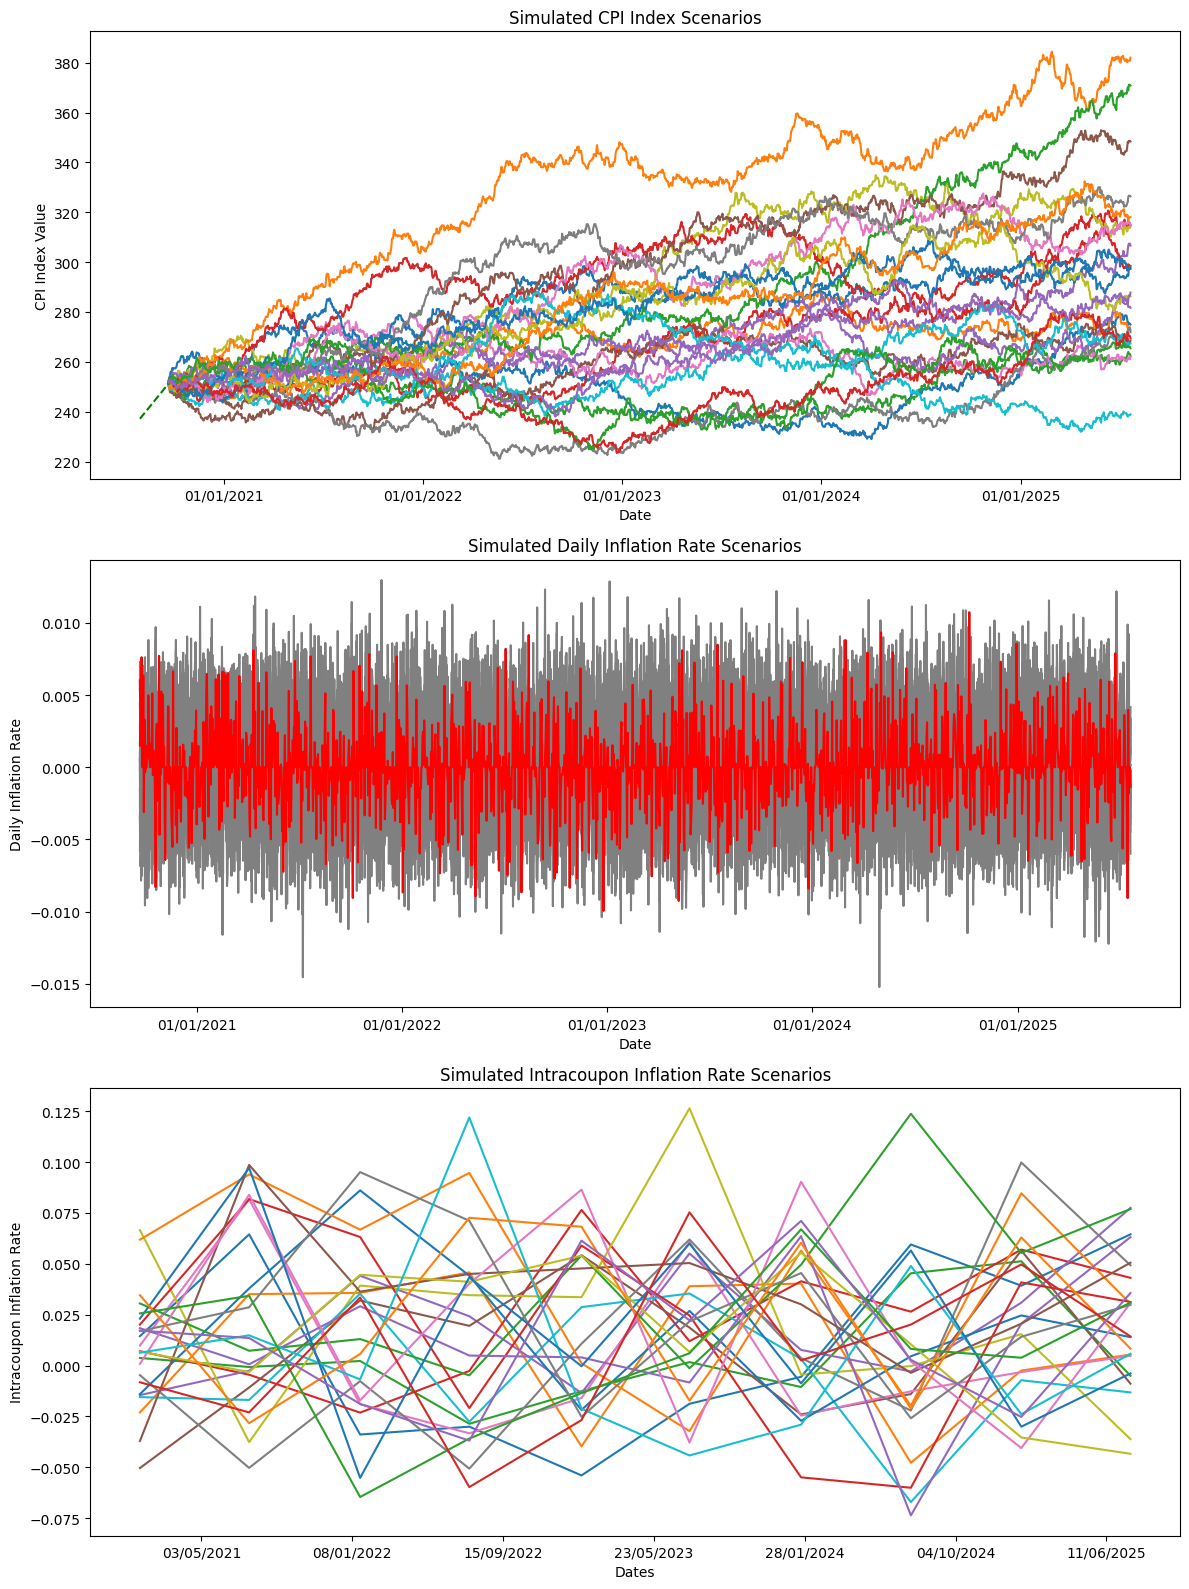

In [18]:
# Generate a list of dates from initial_date_str to maturity_date_str
date_range = pd.date_range(start=initial_date_str, end=maturity_date_str, freq='D')

# First 25 scenarios
sampled_cpi_scenarios = cpi_scenarios[:25]
sampled_daily_inflation_scenarios = daily_inflation_rates[:25]
sampled_intracoupon_inflation_scenarios = intracoupon_inflation_rates[:25]

# Convert dates to matplotlib date format for plotting
coupon_dates_md = [mdates.date2num(datetime.strptime(date, '%d/%m/%Y')) for date in coupon_dates]
settlement_date_md = mdates.date2num(datetime.strptime(settlement_date_str, '%d/%m/%Y'))
maturity_date_md = mdates.date2num(datetime.strptime(maturity_date_str, '%d/%m/%Y'))
initial_date_md = mdates.date2num(datetime.strptime(issue_date_str, '%d/%m/%Y'))

# Adjusting the figure size and layout
plt.figure(figsize=(12, 16))

# CPI Index Plot
plt.subplot(3, 1, 1)
for scenario in sampled_cpi_scenarios:
    plt.plot(date_range, scenario)
plt.plot([initial_date_md, settlement_date_md], [inflation_issue, initial_cpi], 'g--') 
plt.title('Simulated CPI Index Scenarios')
plt.xlabel('Date')
plt.ylabel('CPI Index Value')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

# Daily Inflation Rates
plt.subplot(3, 1, 2)
for scenario in sampled_daily_inflation_scenarios:
    plt.plot(date_range[1:], scenario, color='grey')
plt.plot(date_range[1:], sampled_daily_inflation_scenarios[0], color='r') # Highlighting one scenario in red
plt.title('Simulated Daily Inflation Rate Scenarios')
plt.xlabel('Date')
plt.ylabel('Daily Inflation Rate')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

# Intracoupon Inflation Rates
plt.subplot(3, 1, 3)
for scenario in sampled_intracoupon_inflation_scenarios:
    plt.plot(coupon_dates_md, scenario)
plt.title('Simulated Intracoupon Inflation Rate Scenarios')
plt.xlabel('Dates')
plt.ylabel('Intracoupon Inflation Rate')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

plt.tight_layout()
plt.show()

**Task:** <br><br>
c) For each scenario, calculate the ILB cash flows and estimate their fair value.

**Answer:**

To calculate the cash flows and estimate the fair value of an Inflation-Linked Bond (ILB) for each inflation scenario, we simulate the CPI index and subsequently determine the cash flows based on the coupon payments and the principal repayment at maturity. These cash flows are then discounted to their present value using the Nelson-Siegel-Svensson (NSS) model to reflect the time value of money.

The formula to calculate each cash flow $CF_t$ for a given coupon period $t$ is:

$$ CF_t = \text{Adjusted Notional} \times \frac{\text{Coupon Rate}}{\text{Coupon Frequency}} $$

where the Adjusted Notional is computed as:

$$ \text{Adjusted Notional} = \text{Notional Amount} \times \frac{\text{CPI at Coupoun Date}}{\text{CPI at Previous Coupoun Date}} $$

The fair value of these cash flows $FV$ is the sum of all discounted future cash flows, calculated using continuous compounding:

$$ FV = \sum_{t=1}^{T} CF_t \times \exp(-Yield_t \times t) $$

where $Yield_t$ is the discount rate obtained from the NSS model for time $t$, reflecting the expected future short-term interest rates and the term premium for holding longer-term bonds.

The NSS yield curve is defined as:

$$ r(t) = \beta_0 + \beta_1 \left(\frac{1 - e^{-t/\tau_1}}{t/\tau_1}\right) + \beta_2 \left(\left(\frac{1 - e^{-t/\tau_1}}{t/\tau_1}\right) - e^{-t/\tau_1}\right) + \beta_3 \left(\left(\frac{1 - e^{-t/\tau_2}}{t/\tau_2}\right) - e^{-t/\tau_2}\right) $$

where $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$ are the NSS parameters and $\tau_1$, $\tau_2$ are time decay factors.

The final cash flow includes the principal repayment, adjusted for inflation, and is calculated on the last day of the simulation. For each scenario, the fair value is the sum of the discounted cash flows, including this final principal repayment.

By performing this calculation across all 10000 inflation scenarios, we obtain a distribution of potential fair values for the ILB, which allows us to analyze the sensitivity of the bond's value to changes in inflation expectations.

Below is the Python code that implements this calculation:

In [19]:
def nelson_siegel_svensson(t, params):
    # Check if t is 0 to avoid ZeroDivisionError
    if t == 0:
        return params['beta_0']
    else:
        beta_0, beta_1, beta_2, beta_3, tau_1, tau_2 = params.values()
        return (beta_0 + 
                (beta_1 + beta_2) * (tau_1 / t) * (1 - np.exp(-t / tau_1)) + 
                beta_2 * np.exp(-t / tau_1) + 
                beta_3 * ((tau_2 / t) * (1 - np.exp(-t / tau_2)) - np.exp(-t / tau_2)))

In [20]:
def days_in_year(year):
    """Return the number of days in the given year, accounting for leap years."""
    return 366 if year % 4 == 0 and (year % 100 != 0 or year % 400 == 0) else 365

In [21]:
def calculate_cash_flows_and_pv(cpi_scenarios, nss_params, coupon_dates, notional_amount, coupon_rate, initial_cpi_date_str):
    initial_cpi_date = datetime.strptime(initial_cpi_date_str, "%d/%m/%Y")
    num_coupons = len(coupon_dates)
    cash_flows = np.zeros((len(cpi_scenarios), num_coupons))
    present_values = np.zeros(len(cpi_scenarios))

    for scenario in range(len(cpi_scenarios)):
        previous_cpi = cpi_scenarios[scenario, 0]  # Starting with the initial CPI
        for coupon_index, coupon_date_str in enumerate(coupon_dates):
            coupon_date = datetime.strptime(coupon_date_str, "%d/%m/%Y")
            day = (coupon_date - initial_cpi_date).days

            if day >= len(cpi_scenarios[0]):  # Ensure we don't go beyond our scenario timeline
                continue

            current_cpi = cpi_scenarios[scenario, day]
            adjusted_notional = notional_amount * (current_cpi / previous_cpi)
            coupon_payment = adjusted_notional * (coupon_rate / 100) / len(coupon_dates)
            cash_flows[scenario, coupon_index] = coupon_payment

            # Update previous_cpi for the next iteration
            previous_cpi = current_cpi
            # Discount cash flow
            days_in_current_year = days_in_year(coupon_date.year)
            t = day / days_in_current_year
            discount_factor = np.exp(-nelson_siegel_svensson(t, nss_params) * t)
            present_values[scenario] += cash_flows[scenario, coupon_index] * discount_factor

        # Principal repayment at maturity (included in the last coupon payment)
        final_cpi = cpi_scenarios[scenario, -1]
        principal_repayment = notional_amount * (final_cpi / cpi_scenarios[scenario, 0])
        cash_flows[scenario, -1] += principal_repayment

        # Discount principal repayment
        t = len(cpi_scenarios[0]) / days_in_year(initial_cpi_date.year + num_coupons // len(coupon_dates))
        discount_factor = np.exp(-nelson_siegel_svensson(t, nss_params) * t)
        present_values[scenario] += principal_repayment * discount_factor

    return cash_flows, present_values

In [22]:
cash_flows, present_values = calculate_cash_flows_and_pv(cpi_scenarios, greeks_data, coupon_dates, notional, coupon_rate, '21/09/2020')

In [23]:
df_present_values = pd.DataFrame(present_values, columns = ['Present Value'])
df_present_values.to_csv('Data', index = False)

df_cash_flows = pd.DataFrame(cash_flows, columns = coupon_dates)
df_cash_flows.to_csv('Data', index = False)

In [24]:
df_present_values

,Present Value
0,23579.619353
1,23395.796670
2,22565.993758
3,26807.547186
4,26139.677491
...,...
9995,20740.023024
9996,27063.425951
9997,25120.549320
9998,21312.727982


In [25]:
df_cash_flows

,21/01/2021,21/07/2021,21/01/2022,21/07/2022,23/01/2023,21/07/2023,22/01/2024,22/07/2024,21/01/2025,21/07/2025
0,171.184282,179.632194,163.026560,163.678317,159.633498,165.575261,167.815049,178.790866,175.373229,27547.790171
1,164.857982,174.668602,174.778153,176.479616,162.045832,175.327688,175.547787,160.683506,168.330957,27309.239243
2,169.376703,168.627201,169.126054,163.919252,166.623671,169.033316,166.964801,176.399191,177.399809,26287.396022
3,169.940674,167.986720,164.841791,168.301577,181.656274,170.767623,175.739994,173.217569,178.368682,31525.838866
4,166.296174,168.317163,176.195564,172.839667,166.471451,178.040708,170.042873,168.257825,173.963354,30707.365178
...,...,...,...,...,...,...,...,...,...,...
9995,167.661132,172.372781,170.422546,172.757637,164.791169,175.490146,171.530986,156.800833,159.219233,24036.293079
9996,175.253865,168.451148,175.502357,180.162641,172.308237,161.439925,174.918645,177.156815,171.273385,31834.960483
9997,169.804845,174.182556,182.979556,168.837813,176.157568,165.777384,166.167013,170.651126,160.915214,29445.404015
9998,170.177229,181.547467,158.997453,165.202328,166.894412,168.238996,170.318205,172.086296,170.381506,24734.550597


**Task:** <br><br>
d) Estimate and analyse the inflation linked bond price distribution, including interest rate and inflation risk measures.

**Answer:**

To estimate and analyze the inflation-linked bond (ILB) price distribution, we have calculated the present values of the ILB for each of the 10,000 simulated scenarios. These present values incorporate both interest rate and inflation risk, reflecting changes in the consumer price index (CPI) and shifts in the yield curve.

The statistical measures calculated for the present value distribution are:

- **Mean**: The average of all present values, providing a central tendency measure.
- **Median**: The middle value of the present value distribution, representing the point at which half the observations fall above and below.
- **Standard Deviation**: A measure of the dispersion of present values around the mean.
- **Variance**: The square of the standard deviation, providing another measure of dispersion.
- **Skewness**: A measure of the asymmetry of the distribution of present values. A skewness close to zero suggests a symmetrical distribution.
- **Kurtosis**: A measure of the 'tailedness' of the distribution. A negative kurtosis indicates a distribution with lighter tails and a flatter peak than the normal distribution.

Value at Risk (VaR) and Expected Shortfall (ES) are risk measures that provide information about the potential loss in value of the ILB:

- **Value at Risk (VaR)**: Estimates the maximum loss over a specified time period with a given confidence interval. For instance, a 95% VaR of \$20,414 suggests that there is a 5% probability that the ILB could lose more than \$20,414 in value.
- **Expected Shortfall (ES)**: The average loss in value given that the loss is beyond the VaR threshold. It provides an estimate of the expected loss on the worst days.

The histogram of present values, with overlaid Value at Risk (VaR) lines, visually represents the distribution and the risk measures. The mean and median give a central tendency perspective, while the VaR lines provide a visual cue for the potential downside risk.

Below is the Python code that implements the analysis, including the visualization of the present value distribution with VaR lines:

In [26]:
# Calculate the 95% Value at Risk (VaR)
VaR_95 = df_present_values.quantile(0.05)

# Calculate the Expected Shortfall (ES) at 95%
ES_95 = df_present_values[df_present_values['Present Value'] <= VaR_95.iloc[0]].mean()

VaR_95, ES_95

(Present Value    21256.493708
 Name: 0.05, dtype: float64,
 Present Value    20359.556593
 dtype: float64)

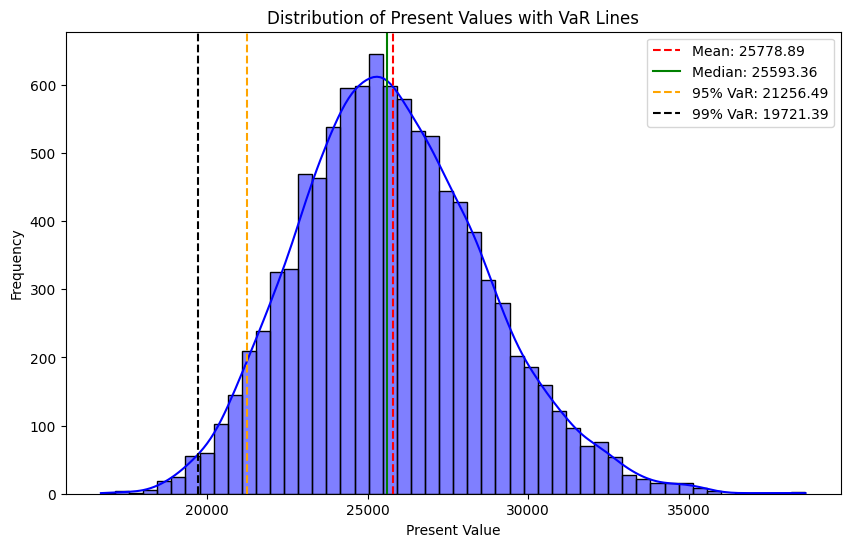

{'Mean': 25778.89297451367,
 'Median': 25593.363804341032,
 'Standard Deviation': 2907.1520976650568,
 'Variance': 8451533.31895834,
 'Skewness': 0.33742192748078187,
 'Kurtosis': 0.1328820545099223,
 '95% VaR': 21256.493707862403,
 '99% VaR': 19721.39433398484,
 '95% ES': 20359.556592913632,
 '99% ES': 19104.22038108358}

In [27]:
# Statistical analysis of the present values
mean_pv = df_present_values['Present Value'].mean()
median_pv = df_present_values['Present Value'].median()
std_dev_pv = df_present_values['Present Value'].std()
variance_pv = std_dev_pv**2
skewness_pv = df_present_values['Present Value'].skew()
kurtosis_pv = df_present_values['Present Value'].kurtosis()

# Value at Risk (VaR) calculations for 95% and 99% confidence intervals
VaR_95 = df_present_values['Present Value'].quantile(0.05)
VaR_99 = df_present_values['Present Value'].quantile(0.01)

# Expected Shortfall (ES) calculations for 95% and 99% confidence intervals
ES_95 = df_present_values[df_present_values['Present Value'] <= VaR_95]['Present Value'].mean()
ES_99 = df_present_values[df_present_values['Present Value'] <= VaR_99]['Present Value'].mean()

# Visualization: Histogram with a kernel density estimate
plt.figure(figsize=(10, 6))
sns.histplot(df_present_values['Present Value'], kde=True, bins=50, color='blue')
plt.axvline(mean_pv, color='r', linestyle='--', label=f'Mean: {mean_pv:.2f}')
plt.axvline(median_pv, color='g', linestyle='-', label=f'Median: {median_pv:.2f}')
plt.axvline(VaR_95, color='orange', linestyle='--', label=f'95% VaR: {VaR_95:.2f}')
plt.axvline(VaR_99, color='black', linestyle='--', label=f'99% VaR: {VaR_99:.2f}')
plt.title('Distribution of Present Values with VaR Lines')
plt.xlabel('Present Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Return the calculated statistics for display
stats_data = {
    "Mean": mean_pv,
    "Median": median_pv,
    "Standard Deviation": std_dev_pv,
    "Variance": variance_pv,
    "Skewness": skewness_pv,
    "Kurtosis": kurtosis_pv,
    "95% VaR": VaR_95,
    "99% VaR": VaR_99,
    "95% ES": ES_95,
    "99% ES": ES_99
}

stats_data

### Question 2

In [6]:
target_portfolio_dict = {
    'Bond': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'],
    'Maturity': ['01/12/2025', '04/12/2026', '06/12/2027', '10/12/2028', '03/12/2029',
                 '09/12/2030', '06/12/2032', '03/12/2035', '03/12/2030', '04/12/2045',
                 '04/12/2050', '01/12/2051', '07/12/2052'],
    'Coupon rate (%)': [4, 7.75, 4, 7, 5.75, 5.5, 4, 4.75, 4.5, 5, 4.5, 4, 5],
    'Quantity': [10000, 250000, 50000, 100000, 10000, 200000, 15000, 10000, 30000, 75000, 100000, 10000, 10000]
}

# Convert the dictionary to a DataFrame
target_portfolio_df = pd.DataFrame(target_portfolio_dict)
target_portfolio_df.set_index('Bond', inplace=True)

hedging_asset_data = {
    'Hedging Asset': ['H1', 'H2', 'H3', 'H4', 'H5'],
    'Maturity': ['12/04/2026', '28/12/2032', '06/05/2035', '10/10/2040', '10/10/2051'],
    'Coupon rate (%)': [4.5, 5, 6, 6, 6.5]
}

# Convert the dictionary to a DataFrame
hedging_df = pd.DataFrame(hedging_asset_data)
hedging_df.set_index('Hedging Asset', inplace=True)

An asset manager holds the following portfolio of fixed-rate Treasury bonds (delivering annual coupons, with a face value). 

In [7]:
target_portfolio_df

,Maturity,Coupon rate (%),Quantity
Bond,,,
1,01/12/2025,4.00,10000
2,04/12/2026,7.75,250000
3,06/12/2027,4.00,50000
4,10/12/2028,7.00,100000
5,03/12/2029,5.75,10000
6,09/12/2030,5.50,200000
7,06/12/2032,4.00,15000
8,03/12/2035,4.75,10000
9,03/12/2030,4.50,30000


He wants to hedge it against yield curve shifts. Assume the spot market yield curve on the valuation date 09/02/2022 is well described by the Nelson–Siegel-Svensson (NSS) parameters:

In [8]:
df_greeks

,Value
Parameter,
beta_0,0.059
beta_1,-0.016
beta_2,-0.005
beta_3,0.010
tau_1,5.000
tau_2,0.500


He selected the following annual coupon paying Treasury bonds (with a €100 face value) as hedging instruments:

In [9]:
hedging_df

,Maturity,Coupon rate (%)
Hedging Asset,,
H1,12/04/2026,4.5
H2,28/12/2032,5.0
H3,06/05/2035,6.0
H4,10/10/2040,6.0
H5,10/10/2051,6.5


The three important dataframes combined for visualization purposes:

In [10]:
df_portfolio_styler = target_portfolio_df.style.set_table_attributes("style='display:inline'").set_caption("Target Portfolio")
df_greeks_styler2 = df_greeks.style.set_table_attributes("style='display:inline'").set_caption("NSS parameters describing market yield curve on vd Feb 9th 2022")
df_hedging_styler = hedging_df.style.set_table_attributes("style='display:inline'").set_caption("Hedging Portfolio")
html_object = df_portfolio_styler._repr_html_() + " " + df_greeks_styler2._repr_html_() + " " + df_hedging_styler._repr_html_()
display_html(html_object, raw = True)

,Maturity,Coupon rate (%),Quantity
Bond,,,
1,01/12/2025,4.000000,10000
2,04/12/2026,7.750000,250000
3,06/12/2027,4.000000,50000
4,10/12/2028,7.000000,100000
5,03/12/2029,5.750000,10000
6,09/12/2030,5.500000,200000
7,06/12/2032,4.000000,15000
8,03/12/2035,4.750000,10000
9,03/12/2030,4.500000,30000


**Task**: <br><br>
a) Compute the level, slope and curvature durations and $durations of target portfolio.

**Answer:**

**Portfolio Duration Measures in Fixed Income Securities**

Managing a fixed income portfolio requires a keen understanding of its sensitivity to interest rate movements. This sensitivity is encapsulated in various duration measures: Dollar Duration, Level Duration, Slope Duration, and Curvature Duration.

**1. Dollar Duration**
Dollar Duration is a key measure quantifying the change in a portfolio's value for a 1 basis point change in interest rates. It translates interest rate risk into monetary terms and is defined as:
$$ \text{Dollar Duration} = \text{Modified Duration} \times \text{Present Value} $$

**2. Level Duration (Macaulay Duration)**
Level Duration, akin to traditional Macaulay Duration, measures the portfolio's sensitivity to parallel shifts in the yield curve. It represents the weighted average time until cash flows are received and is influenced significantly by the $\beta_0$ parameter of the Nelson-Siegel-Svensson (NSS) model.

**3. Slope Duration**
Slope Duration examines the portfolio's sensitivity to changes in the yield curve's slope. It's pertinent for understanding the differential movement between short-term and long-term interest rates and is influenced by the $\beta_1$ parameter of the NSS model.

**4. Curvature Duration**
Curvature Duration focuses on the portfolio's sensitivity to changes in the curvature of the yield curve. This duration is essential for understanding the bond's price sensitivity to nonlinear shifts in the yield curve, particularly influenced by $\beta_2$ and $\beta_3$ parameters of the NSS model.

**Nelson-Siegel-Svensson Model**
The NSS model, crucial for these calculations, is defined as:
$$ r(t) = \beta_0 + \beta_1\left(\frac{1-e^{-t/\tau_1}}{t/\tau_1}\right) + \beta_2\left(\left(\frac{1-e^{-t/\tau_1}}{t/\tau_1}\right) - e^{-t/\tau_1}\right) + \beta_3\left(\left(\frac{1-e^{-t/\tau_2}}{t/\tau_2}\right) - e^{-t/\tau_2}\right) $$

**Calculating Portfolio Durations**
The overall duration measures for the portfolio are determined by weighting each bond's duration by its market value within the portfolio. This approach factors in individual bond sensitivities to the level, slope, and curvature of the yield curve as per the NSS model.

**Summary**
A comprehensive grasp of these duration measures is vital for effective fixed income portfolio management. They collectively provide a multifaceted view of the portfolio's interest rate risk and are foundational for devising robust hedging strategies.

In [11]:
# Function to calculate the spot rate using Nelson-Siegel-Svensson model
def nelson_siegel_svensson(t, beta0, beta1, beta2, beta3, tau1, tau2):
    if t == 0:
        return beta0
    term1 = beta0
    term2 = beta1 * ((1 - np.exp(-t / tau1)) / (t / tau1))
    term3 = beta2 * (((1 - np.exp(-t / tau1)) / (t / tau1)) - np.exp(-t / tau1))
    term4 = beta3 * (((1 - np.exp(-t / tau2)) / (t / tau2)) - np.exp(-t / tau2))
    return term1 + term2 + term3 + term4

In [12]:
# Function to calculate bond durations and sensitivities
def calculate_bond_durations(coupon_rate, maturity_date, face_value, nss_params):
    maturity_date = datetime.strptime(maturity_date, "%d/%m/%Y")
    valuation_date = datetime.strptime("09/02/2022", "%d/%m/%Y")  # Using a fixed valuation date
    years_to_maturity = int(np.round((maturity_date - valuation_date).days / 365))
    cash_flows = face_value * coupon_rate * np.ones(years_to_maturity)  # Coupons
    cash_flows[-1] += face_value  # Add principal redemption at maturity
    theta_i = np.arange(1, years_to_maturity + 1)  # Time to cash flow payments (in years)

    # Extracting NSS parameters
    beta0, beta1, beta2, beta3, tau1, tau2 = nss_params

    # Compute bond's present value (PV)
    B0 = np.sum([cf * np.exp(-nelson_siegel_svensson(t, beta0, beta1, beta2, beta3, tau1, tau2) * t) for t, cf in zip(theta_i, cash_flows)])

    # Sensitivities (dollar durations)
    beta0_sens = -np.sum([cf * t * np.exp(-nelson_siegel_svensson(t, beta0, beta1, beta2, beta3, tau1, tau2) * t) for t, cf in zip(theta_i, cash_flows)])
    beta1_sens = -np.sum([cf * t * (1 - np.exp(-t / tau1)) / (t / tau1) * np.exp(-nelson_siegel_svensson(t, beta0, beta1, beta2, beta3, tau1, tau2) * t) for t, cf in zip(theta_i, cash_flows)])
    beta2_sens = -np.sum([cf * t * ((1 - np.exp(-t / tau1)) / (t / tau1) - np.exp(-t / tau1)) * np.exp(-nelson_siegel_svensson(t, beta0, beta1, beta2, beta3, tau1, tau2) * t) for t, cf in zip(theta_i, cash_flows)])
    beta3_sens = -np.sum([cf * t * ((1 - np.exp(-t / tau2)) / (t / tau2) - np.exp(-t / tau2)) * np.exp(-nelson_siegel_svensson(t, beta0, beta1, beta2, beta3, tau1, tau2) * t) for t, cf in zip(theta_i, cash_flows)])

    # Parametric durations
    D0 = -(1 / B0) * beta0_sens
    D1 = -(1 / B0) * beta1_sens
    D2 = -(1 / B0) * beta2_sens
    D3 = -(1 / B0) * beta3_sens

    # Organizing results 
    durations = {'level-beta0': D0, 'slope-beta1': D1, 'curvature-beta2': D2, 'curvature-beta3': D3}
    sensitivities = {'level-beta0': beta0_sens, 'slope-beta1': beta1_sens, 'curvature-beta2': beta2_sens, 'curvature-beta3': beta3_sens}
    
    return durations, sensitivities, B0

In [13]:
constant_face_value = 100

# Prepare NSS parameters
nss_params = df_greeks.loc[:, 'Value'].to_numpy()

# Initialize portfolio-level metrics for durations and sensitivities
portfolio_durations = {'level-beta0': 0, 'slope-beta1': 0, 'curvature-beta2': 0, 'curvature-beta3': 0}
portfolio_sensitivities = {'level-beta0': 0, 'slope-beta1': 0, 'curvature-beta2': 0, 'curvature-beta3': 0}

# Initialize variable for total market value and dollar-duration
total_market_value = 0
portfolio_dollar_duration = 0

# Calculate durations and sensitivities for each bond in the portfolio
for index, bond in target_portfolio_df.iterrows():
    bond_durations, bond_sensitivities, bond_price = calculate_bond_durations(
        bond['Coupon rate (%)'] / 100, bond['Maturity'], constant_face_value, nss_params)
    market_value = bond['Quantity'] * bond_price
    total_market_value += market_value

    # Calculate and aggregate dollar-duration
    modified_duration = bond_durations['level-beta0'] / (1 + bond_price / 100)
    portfolio_dollar_duration += modified_duration * market_value

    # Aggregate other durations and sensitivities
    for key in portfolio_durations:
        portfolio_durations[key] += bond_durations[key] * market_value
    for key in portfolio_sensitivities:
        portfolio_sensitivities[key] += bond_sensitivities[key] * market_value

# Normalize the durations and sensitivities by the total market value of the portfolio
for key in portfolio_durations:
    portfolio_durations[key] /= total_market_value
for key in portfolio_sensitivities:
    portfolio_sensitivities[key] /= total_market_value

# Normalize dollar-duration by the total market value of the portfolio
portfolio_dollar_duration /= total_market_value

# Output results
portfolio_durations, portfolio_sensitivities, portfolio_dollar_duration

({'level-beta0': 7.585479686412396,
  'slope-beta1': 3.3999509599563593,
  'curvature-beta2': 1.9189016594855828,
  'curvature-beta3': 0.48562735616025865},
 {'level-beta0': -748.9729344912602,
  'slope-beta1': -346.1140496496504,
  'curvature-beta2': -191.15643654596244,
  'curvature-beta3': -49.95181300234363},
 3.8269912621896602)

In [14]:
target_portfolio_durations = {'Standard Durations': portfolio_durations, 'Dollar-Durations Sensitivities': portfolio_sensitivities}
df_target_portfolio_durations = pd.DataFrame(target_portfolio_durations)
df_target_portfolio_durations

,Standard Durations,Dollar-Durations Sensitivities
level-beta0,7.585480,-748.972934
slope-beta1,3.399951,-346.114050
curvature-beta2,1.918902,-191.156437
curvature-beta3,0.485627,-49.951813


In [15]:
def update_df_with_metrics(df, nss_params):
    # Add new columns for calculated metrics and explicitly cast them as float
    df['Bond Price'] = 0.0
    metrics = ['level-beta0', 'slope-beta1', 'curvature-beta2', 'curvature-beta3']
    for metric in metrics:
        df[metric + ' Duration'] = 0.0
        df[metric + ' Sensitivity'] = 0.0

    for index, bond in df.iterrows():
        # Assume constant face value for all bonds
        face_value = 100
        bond_durations, bond_sensitivities, bond_price = calculate_bond_durations(
            bond['Coupon rate (%)'] / 100, bond['Maturity'], face_value, nss_params)
        
        # Update bond price and duration/sensitivity metrics for each bond
        df.at[index, 'Bond Price'] = bond_price
        for key in bond_durations:
            df.at[index, key + ' Duration'] = bond_durations[key]
        for key in bond_sensitivities:
            df.at[index, key + ' Sensitivity'] = bond_sensitivities[key]

    return df

In [16]:
updated_target_portfolio_df = update_df_with_metrics(target_portfolio_df.copy(), nss_params)
updated_target_portfolio_df

,Maturity,Coupon rate (%),Quantity,Bond Price,level-beta0 Duration,level-beta0 Sensitivity,slope-beta1 Duration,slope-beta1 Sensitivity,curvature-beta2 Duration,curvature-beta2 Sensitivity,curvature-beta3 Duration,curvature-beta3 Sensitivity
Bond,,,,,,,,,,,,
1,01/12/2025,4.00,10000,96.741840,3.770583,-364.773162,2.621103,-253.570334,0.884976,-85.614198,0.488620,-47.269958
2,04/12/2026,7.75,250000,112.078569,4.370446,-489.833335,2.839292,-318.223827,1.112573,-124.695553,0.482933,-54.126416
3,06/12/2027,4.00,50000,94.818814,5.432823,-515.133810,3.236954,-306.924136,1.492629,-141.529338,0.489662,-46.429136
4,10/12/2028,7.00,100000,111.184284,5.833387,-648.580915,3.295956,-366.458550,1.637634,-182.079150,0.484613,-53.881402
5,03/12/2029,5.75,10000,104.097349,6.656565,-692.930724,3.505734,-364.937585,1.914584,-199.303089,0.486503,-50.643718
6,09/12/2030,5.50,200000,102.416585,7.346916,-752.446042,3.638698,-372.663029,2.130130,-218.160676,0.486879,-49.864472
7,06/12/2032,4.00,15000,89.786788,8.969759,-805.365860,3.912919,-351.328394,2.588189,-232.385218,0.489115,-43.916077
8,03/12/2035,4.75,10000,94.346398,10.378161,-979.142143,3.983792,-375.856441,2.850590,-268.942872,0.487699,-46.012635
9,03/12/2030,4.50,30000,95.321640,7.546806,-719.373944,3.703367,-353.010994,2.197324,-209.452487,0.488465,-46.561329


In [18]:
(updated_target_portfolio_df['Quantity'] * updated_target_portfolio_df['Bond Price']).sum()

88705967.2539232

**Task**: <br><br>
b) Compute the level, slope and curvature durations and $durations of hedging assets.

**Answer:**

**Computing Durations and Sensitivities of Hedging Assets**

For fixed income portfolio management, it's critical to understand not only the portfolio's sensitivity to interest rate movements but also the characteristics of the hedging assets. This is achieved by computing level, slope, and curvature durations, as well as their sensitivities for each hedging asset.

**1. Level, Slope, and Curvature Durations for Hedging Assets**
These durations are calculated for each hedging instrument in the portfolio. They represent the sensitivity of the hedging assets to various changes in the yield curve: parallel shifts (level), steepening or flattening (slope), and changes in curvature (curvature).

- **Level Duration (Beta0)**: Reflects sensitivity to parallel shifts in the yield curve.
- **Slope Duration (Beta1)**: Measures sensitivity to changes in the slope of the yield curve.
- **Curvature Duration (Beta2 and Beta3)**: Indicates sensitivity to changes in the curvature of the yield curve.

**2. Sensitivities for Hedging Assets**
Similar to the portfolio's sensitivities, each hedging instrument's sensitivities to the level, slope, and curvature of the yield curve are calculated. These sensitivities help in understanding the impact of interest rate changes on the hedging instruments.

**3. Practical Application**
By analyzing these durations and sensitivities, one can effectively strategize the hedging process against interest rate movements. This involves aligning the portfolio's interest rate risk profile with that of the hedging instruments.

**4. Computational Approach**
Using the Nelson-Siegel-Svensson (NSS) model, the sensitivity of each hedging instrument to changes in interest rates is computed. This involves detailed calculations of the bond's price, its durations, and sensitivities based on the NSS model parameters.

**Summary**
The computed durations and sensitivities for the hedging assets provide valuable insights for managing interest rate risk in a fixed income portfolio. It enables the development of robust hedging strategies to mitigate potential risks arising from interest rate fluctuations.

In [39]:
# Initialize dictionaries for aggregated portfolio durations and sensitivities
hedging_portfolio_durations = {'level-beta0': 0, 'slope-beta1': 0, 'curvature-beta2': 0, 'curvature-beta3': 0}
hedging_portfolio_sensitivities = {'level-beta0': 0, 'slope-beta1': 0, 'curvature-beta2': 0, 'curvature-beta3': 0}

# Loop through each bond in the hedging portfolio
for index, bond in hedging_df.iterrows():
    # Calculate durations and sensitivities for the bond
    bond_durations, bond_sensitivities, bond_price = calculate_bond_durations(
        bond['Coupon rate (%)'], bond['Maturity'], constant_face_value, nss_params)

    # Aggregate the results for the entire portfolio
    for key in hedging_portfolio_durations:
        hedging_portfolio_durations[key] += bond_durations[key]  # Adjust as needed (e.g., weighted average)
        hedging_portfolio_sensitivities[key] += bond_sensitivities[key]  # Adjust as needed

# Convert the aggregated results to a DataFrame for presentation
df_hedging_portfolio = pd.DataFrame({
    'Standard Duration': hedging_portfolio_durations,
    'Dollar-Durations Sensitivities': hedging_portfolio_sensitivities
})

In [40]:
#df_hedging_portfolio

In [41]:
# Update hedging_df with individual bond/hedging instrument metrics
updated_hedging_df = update_df_with_metrics(hedging_df.copy(), nss_params)
updated_hedging_df

,Maturity,Coupon rate (%),Bond Price,level-beta0 Duration,level-beta0 Sensitivity,slope-beta1 Duration,slope-beta1 Sensitivity,curvature-beta2 Duration,curvature-beta2 Sensitivity,curvature-beta3 Duration,curvature-beta3 Sensitivity
Hedging Asset,,,,,,,,,,,
H1,12/04/2026,4.5,98.519792,3.746564,-369.110696,2.607257,-256.866378,0.877536,-86.454640,0.487586,-48.036885
H2,28/12/2032,5.0,98.049020,8.676050,-850.678215,3.835802,-376.096588,2.495753,-244.706135,0.487540,-47.802864
H3,06/05/2035,6.0,106.512956,9.471809,-1008.870331,3.867106,-411.896844,2.646052,-281.838808,0.486237,-51.790502
H4,10/10/2040,6.0,106.689206,11.962751,-1276.296357,3.979428,-424.561965,2.986689,-318.647488,0.486259,-51.878627
H5,10/10/2051,6.5,113.899468,14.548919,-1657.114117,3.993167,-454.819602,3.085286,-351.412409,0.486057,-55.361594


**Task**: <br><br>
c) Estimate the holdings of the hedging portfolio assuming the hedger wants to implement a self-financing (full) hedging strategy.

**Answer:**

**Estimating Holdings for a Self-Financing Hedging Strategy**

In fixed income portfolio management, implementing a self-financing (full) hedging strategy involves precisely determining the holdings of hedging instruments. The objective is to align the hedging portfolio's interest rate risk profile with that of the target portfolio, thereby mitigating potential interest rate risks.

**1. Self-Financing Hedging Strategy**
A self-financing hedging strategy aims to fully offset the interest rate risk in the target portfolio without additional funding. This involves calculating the necessary quantities of each hedging instrument to match the duration and sensitivity profiles of the target portfolio.

**2. Computational Approach**
To estimate the holdings of the hedging portfolio, a system of linear equations is set up and solved. This system represents the relationship between the durations and sensitivities of the hedging instruments and the target portfolio.

- **Matrix A**: Represents the sensitivities of the hedging instruments to the level, slope, and curvature of the yield curve, along with their prices.
- **Vector B**: Represents the target portfolio's sensitivities to these factors and its market value.
- **Solution (w)**: The solution vector 'w' provides the required holdings in each hedging instrument to achieve the desired hedging effect.

**3. Solving the System of Equations**
The system of equations is solved using matrix algebra, specifically the `numpy.linalg.solve` method in Python. This yields the exact quantities of each hedging instrument needed for the self-financing hedging strategy.

**4. Verifying Solution Correctness**
The correctness of the solution can be verified by ensuring that the calculated holdings align the duration and sensitivity profiles of the hedging portfolio with those of the target portfolio. The solution should also respect the self-financing constraint, implying that the sum of the products of the quantities and prices of the hedging instruments equals the market value of the target portfolio.

**Summary**
Successfully implementing a self-financing hedging strategy requires precise calculations and a thorough understanding of the interest rate risk profiles of both the target and hedging portfolios. The computed holdings enable the portfolio manager to effectively hedge against interest rate risks without additional funding.

In [42]:
columns_for_matrix = ['level-beta0 Sensitivity', 'slope-beta1 Sensitivity', 'curvature-beta2 Sensitivity', 'curvature-beta3 Sensitivity']
matrix_A = (-1) * updated_hedging_df[columns_for_matrix]
matrix_A['Bond Price'] = updated_hedging_df['Bond Price']
A_T = matrix_A.to_numpy()
A = A_T.T
A

array([[ 369.11069579,  850.6782149 , 1008.87033096, 1276.29635696,
        1657.11411708],
       [ 256.86637817,  376.09658752,  411.89684411,  424.56196549,
         454.81960171],
       [  86.45463982,  244.70613527,  281.83880807,  318.64748848,
         351.41240927],
       [  48.0368845 ,   47.80286363,   51.79050245,   51.87862706,
          55.36159355],
       [  98.51979169,   98.04902045,  106.51295632,  106.68920553,
         113.89946778]])

In [44]:
target_portfolio_pv = updated_target_portfolio_df['Bond Price'] * updated_target_portfolio_df['Quantity']
portfolio_pv = target_portfolio_pv.sum()
B = df_target_portfolio_durations['Dollar-Durations Sensitivities'].to_numpy()
B = np.append(B, portfolio_pv)
B = B.reshape(-1)
B

array([-7.48972934e+02, -3.46114050e+02, -1.91156437e+02, -4.99518130e+01,
        8.87059673e+07])

In [45]:
w = np.linalg.solve(A, B)
weights = ['{:.2f}'.format(value) for value in w]
weights

['-6711074.71',
 '-314116891.19',
 '484307149.99',
 '-263095178.64',
 '70528533.38']

In [46]:
calc_portfolio_holdings_sens = A.dot(w)
calc_portfolio_holdings_sens

array([-7.48972978e+02, -3.46114002e+02, -1.91156435e+02, -4.99518085e+01,
        8.87059673e+07])

In [47]:
port_match = np.isclose(calc_portfolio_holdings_sens, B)
port_match

array([ True,  True,  True,  True,  True])

d) Assume that immediately after the hedging strategy was established, the yield curve changed and is now given by the following set of NSS parameters:

In [48]:
greeks_data_changed = {
    "beta_0": 6.5 / 100,
    "beta_1": -1.0 / 100,
    "beta_2": 0.1 /100 ,
    "beta_3": 2.0 / 100,
    "tau_1": 5,
    "tau_2": 0.5
}

df_greeks_changed = pd.DataFrame(greeks_data_changed.items(), columns=['Parameter', 'Value'])
df_greeks_changed.set_index('Parameter', inplace=True)

df_greeks_changed

,Value
Parameter,
beta_0,0.065
beta_1,-0.010
beta_2,0.001
beta_3,0.020
tau_1,5.000
tau_2,0.500


i. Estimate the impact of this shift in the yield curve on the Target Portfolio assuming no hedging strategy had been implemented. Discuss the results.

**Answer**

In this part, we evaluate how a shift in the yield curve affects the target bond portfolio in the absence of a hedging strategy. The new yield curve is defined by a set of Nelson-Siegel-Svensson (NSS) parameters, reflecting a different interest rate environment. The key steps are as follows:

1. **Update Bond Prices**: Utilize the new NSS parameters to recalculate the bond prices in the target portfolio. This involves updating the spot rate calculation using the NSS model for each bond, given their specific maturity and coupon rate.

2. **Calculate Value Changes**: For each bond, the change in value is determined by the difference in bond prices (new price minus original price) multiplied by the quantity of each bond held in the portfolio.

3. **Aggregate Impact**: Sum up the individual value changes across all bonds in the portfolio to estimate the total impact.

The calculated total impact reveals the sensitivity of the portfolio to the specified shift in the yield curve. A negative value indicates a loss due to rising rates, while a positive value indicates a gain in a falling rate environment.

This analysis is crucial for understanding the inherent interest rate risk in the portfolio and underscores the importance of a hedging strategy to mitigate such risks.


In [49]:
new_nss_params = df_greeks_changed.loc[:, 'Value'].to_numpy()
new_nss_params

array([ 6.5e-02, -1.0e-02,  1.0e-03,  2.0e-02,  5.0e+00,  5.0e-01])

In [50]:
# Function to recalculate bond prices with new NSS parameters
def recalculate_bond_price(row, new_nss_params):
    _, _, bond_price = calculate_bond_durations(row['Coupon rate (%)'], row['Maturity'], constant_face_value, new_nss_params)
    return bond_price

In [51]:
# Calculate the new bond prices for the target portfolio
updated_target_portfolio_df['New Bond Price'] = updated_target_portfolio_df.apply(
    lambda row: calculate_bond_durations(row['Coupon rate (%)'] , row['Maturity'], constant_face_value, new_nss_params)[2], axis=1)

# Calculate original total portfolio value (P0)
original_total_value = updated_target_portfolio_df['Bond Price'] * updated_target_portfolio_df['Quantity']
P0 = original_total_value.sum()

# Calculate new total portfolio value (P0_new) after yield curve shift
new_total_value = updated_target_portfolio_df['New Bond Price'] * updated_target_portfolio_df['Quantity']
P0_new = new_total_value.sum()

# Compute the percentage change in total portfolio value
percentage_change = ((P0_new - P0) / P0) * 100

# Output the result
print(f"Percentage Change in Total Portfolio Value (No Hedging): {percentage_change:.2f}%")

Percentage Change in Total Portfolio Value (No Hedging): 3801.79%


ii. Estimate the impact of this change in the yield curve on the global portfolio (target bond portfolio plus hedging instruments) and discuss the performance of the hedging strategy. 

**Answer**

This section assesses the overall performance of the hedging strategy by examining its effectiveness against the same yield curve shift as in part d) i). The global portfolio includes both the target bond portfolio and the hedging instruments. The approach is similar to that in d) i), but applied to the combined portfolio:

1. **Update Bond Prices for Hedging Instruments**: Recalculate bond prices for the hedging instruments using the new NSS parameters. This mirrors the process in the target portfolio, but applies to the hedging instruments.

2. **Calculate Value Changes for Both Portfolios**: Determine the change in value for each instrument in both the target and hedging portfolios. This involves the difference in bond prices (new price minus original price), multiplied by the respective quantities. For hedging instruments, the quantities are as determined in the hedging strategy.

3. **Combined Portfolio Impact**: Sum the value changes from both the target and hedging portfolios to find the total impact on the global portfolio.

The overall impact on the global portfolio provides insight into the efficacy of the hedging strategy. An effective hedge would minimize the portfolio's sensitivity to the yield curve shift, reducing the total impact compared to the target portfolio alone. This result helps gauge the resilience of the hedging strategy under the new interest rate conditions, highlighting its role in risk management.


In [55]:
# Calculate the new bond prices for the hedging portfolio
updated_hedging_df['New Bond Price'] = updated_hedging_df.apply(
    lambda row: calculate_bond_durations(row['Coupon rate (%)'], row['Maturity'], constant_face_value, new_nss_params)[2], axis=1)

# Assume the quantities for hedging instruments are as calculated in 'w'
hedging_quantities = w

# Calculate the change in value for each hedging instrument
updated_hedging_df['Value Change'] = (updated_hedging_df['New Bond Price'] - updated_hedging_df['Bond Price']) * hedging_quantities

# Total impact on the hedging portfolio
total_impact_hedging_portfolio = updated_hedging_df['Value Change'].sum()

# Combined impact on the global portfolio
total_impact_global_portfolio = percentage_change + total_impact_hedging_portfolio

# Output results
print(f"Total Impact on Global Portfolio (With Hedging): {total_impact_global_portfolio}")

Total Impact on Global Portfolio (With Hedging): 183906942331.64517
